# Model Fitting - XGBoost
Fit the XGBoost model using the training dataset. XGBoost is faster and has potentially better accuracy. This allow me to use more features and test changes faster.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.lines import Line2D
import joblib

from src.data.labels_util import load_labels, LabelCol, get_labels_file, load_clean_labels, get_workouts
from src.data.imu_util import (
    get_sensor_file, ImuCol, load_imu_data, Sensor, fix_epoch, resample_uniformly, time_to_row_range, get_data_chunk,
    normalize_with_bounds, data_to_features, list_imu_abspaths, clean_imu_data
)
from src.data.util import find_nearest, find_nearest_index, shift, low_pass_filter, add_col
from src.data.workout import Activity, Workout
from src.data.data import DataState
from src.data.build_features import main as build_features
from src.data.features_util import list_test_files
from src.model.train import evaluate_model_accuracy, train_model, create_xgboost
from src.model.predict import evaluate_on_test_data, evaluate_on_test_data_plot
from src.visualization.visualize import multiplot
from src.config import (
    TRAIN_BOOT_DIR, TRAIN_POLE_DIR, TRAIN_FEATURES_FILENAME, TRAIN_LABELS_FILENAME, BOOT_MODEL_FILE, 
    POLE_MODEL_FILE
)

# import data types
from pandas import DataFrame
from numpy import ndarray
from typing import List, Tuple, Optional

### Evaluate quality of model and training data

In [2]:
# UNCOMMENT to use. It's very slow.

# print('Boot model:')
# features: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels, create_xgboost())

Boot model:
Evaluating model accuracy...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed: 22.0min remaining: 22.0min


Mean Accuracy: 0.956 (0.001)


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 22.0min finished


In [3]:
# print('Pole model:')
# features: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels)

### Train model

In [4]:
print('Train boot model:')
# train_model(Activity.Boot, create_xgboost())

Train boot model:


In [5]:
print('Train pole model:')
# train_model(Activity.Pole, create_xgboost())

Train pole model:


### Test model

Test boot model:


<IPython.core.display.Javascript object>


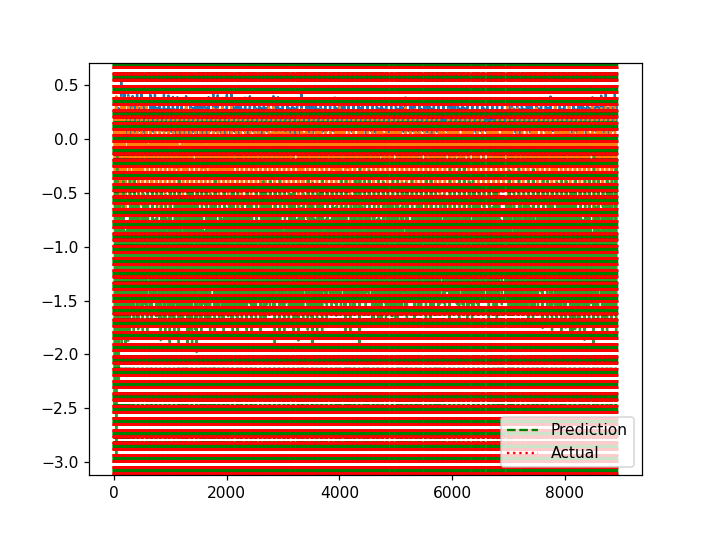

Accuracy: 0.895374
Confusion Matrix:
[[4620  578]
 [ 356 3373]]
Classification Report:
              precision    recall  f1-score   support

   Non-steps       0.93      0.89      0.91      5198
       Steps       0.85      0.90      0.88      3729

    accuracy                           0.90      8927
   macro avg       0.89      0.90      0.89      8927
weighted avg       0.90      0.90      0.90      8927



In [6]:
print('Test boot model:')
evaluate_on_test_data_plot(Activity.Boot, True, test_idx=0)

Test pole model:


<IPython.core.display.Javascript object>


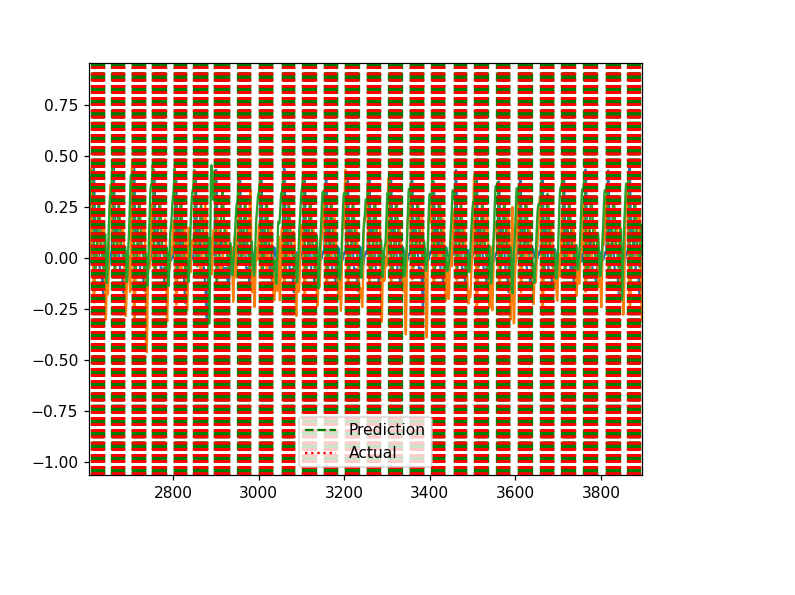

Accuracy: 0.974434
Confusion Matrix:
[[4637  271]
 [  61 8017]]
Classification Report:
              precision    recall  f1-score   support

   Non-steps       0.99      0.94      0.97      4908
       Steps       0.97      0.99      0.98      8078

    accuracy                           0.97     12986
   macro avg       0.98      0.97      0.97     12986
weighted avg       0.97      0.97      0.97     12986



In [7]:
print('Test pole model:')
evaluate_on_test_data_plot(Activity.Pole, True, test_idx=0)